In [1]:
import pandas as pd
import numpy as np

station_data = np.load('.\\processed_data\\201901_station.npy')
outflow = pd.DataFrame(station_data[:, :, 0].T)
inflow = pd.DataFrame(station_data[:, :, 1].T)

print(outflow.shape, inflow.shape)

(51, 744) (51, 744)


In [18]:
import datetime
import matplotlib.pyplot as plt

start_weekday = datetime.datetime(2019,1,1).weekday()

weekday_list = []
for i in range(7):
    weekday_list.append([j for j in range(outflow.shape[1]) if (j // 24) % 7 == i])

weekday_mean = np.zeros(7)
weekday_sum = np.zeros(7)
for i, w in enumerate(weekday_list):
    source = np.array(outflow.iloc[:, w]).flatten()
    weekday_mean[(start_weekday+i)%7] = np.mean(source)
    weekday_sum[(start_weekday+i)%7] = np.sum(source)


In [19]:
print(weekday_mean, weekday_sum)

[0.         3.21503268 0.         0.         0.         0.
 0.        ] [    0. 19676.     0.     0.     0.     0.     0.]


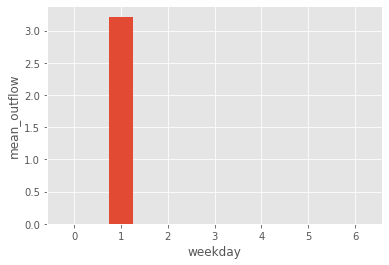

In [20]:
plt.style.use('ggplot')

plt.bar(np.arange(7), weekday_mean, width=0.5)

plt.ylabel('mean_outflow')
plt.xlabel('weekday')
plt.show()

In [25]:
hour_list = []
for i in range(24):
    hour_list.append(np.arange(i, outflow.shape[1], 24))

hour_out_mean = np.zeros(24)
hour_in_mean = np.arange(24)
for i, w in enumerate(hour_list):
    hour_out_mean[(start_weekday+i)%7] = np.mean(np.array(outflow.iloc[:, w]).flatten())
    hour_in_mean[(start_weekday+i)%7] = np.mean(np.array(inflow.iloc[:, w]).flatten())


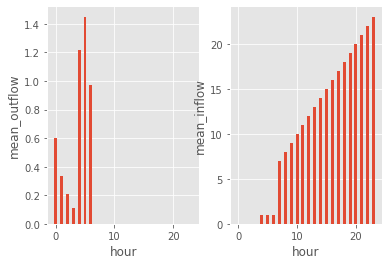

In [26]:
plt.subplot(1,2,1)
plt.bar(np.arange(24), hour_out_mean, width=0.5)

plt.ylabel('mean_outflow')
plt.xlabel('hour')

plt.subplot(1,2,2)
plt.bar(np.arange(24), hour_in_mean, width=0.5)

plt.ylabel('mean_inflow')
plt.xlabel('hour')

plt.show()


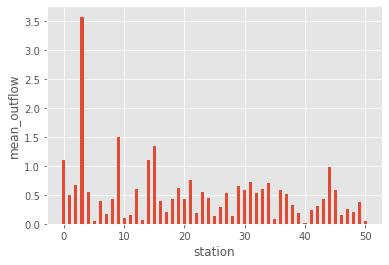

In [21]:
station_mean = [np.mean(outflow.iloc[i, :]) for i in range(outflow.shape[0])]

plt.bar(np.arange(outflow.shape[0]), station_mean, width=0.5)

plt.ylabel('mean_outflow')
plt.xlabel('station')
plt.show()